In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
x_train = pd.read_csv('/content/sample_data/mnist_train_small.csv')

In [5]:
y_train = x_train.iloc[:,:1]


In [6]:
x_train.shape

(19999, 785)

In [7]:
x_train.drop(columns =x_train.iloc[:,:1],inplace=True)

In [8]:
x_train.shape

(19999, 784)

In [9]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

In [10]:
x_reshaped = np.reshape(x_train,(x_train.shape[0],28,28))

In [11]:
x_reshaped.ndim

3

In [12]:
x_reshaped.shape

(19999, 28, 28)

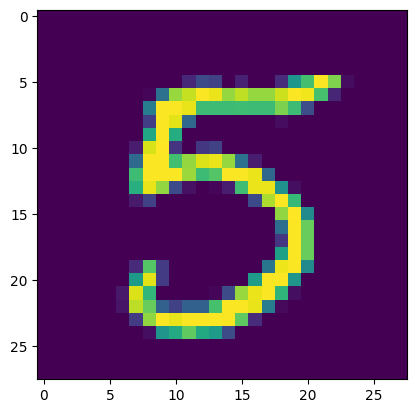

In [13]:
plt.imshow(x_reshaped[0])

In [14]:
model = Sequential()

model.add(Conv2D(4,kernel_size = (3,3),activation='relu',input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))


model.add(Conv2D(6,kernel_size = (3,3),activation='relu',input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))



model.add(Conv2D(7,kernel_size = (3,3),activation='relu',input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))



# Flatten Layer -
model.add(Flatten())


# Dense Layer
model.add(Dense(128,activation='relu'))

# Output Layer
model.add(Dense(10,activation='softmax'))





In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 4)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 6)         222       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 6)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 7)           385       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 7)           0

In [19]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(x_reshaped,y_train,epochs=15)

Epoch 1/15
625/625 [==============================] - 8s 5ms/step - loss: 1.3835 - accuracy: 0.5177
Epoch 2/15
625/625 [==============================] - 2s 4ms/step - loss: 0.6471 - accuracy: 0.7884
Epoch 3/15
625/625 [==============================] - 2s 4ms/step - loss: 0.4462 - accuracy: 0.8608
Epoch 4/15
625/625 [==============================] - 2s 4ms/step - loss: 0.3747 - accuracy: 0.8838
Epoch 5/15
625/625 [==============================] - 2s 4ms/step - loss: 0.3365 - accuracy: 0.8954
Epoch 6/15
625/625 [==============================] - 3s 5ms/step - loss: 0.3120 - accuracy: 0.9036
Epoch 7/15
625/625 [==============================] - 2s 4ms/step - loss: 0.2935 - accuracy: 0.9065
Epoch 8/15
625/625 [==============================] - 3s 4ms/step - loss: 0.2790 - accuracy: 0.9114
Epoch 9/15
625/625 [==============================] - 2s 4ms/step - loss: 0.2625 - accuracy: 0.9175
Epoch 10/15
625/625 [==============================] - 2s 4ms/step - loss: 0.2566 - accuracy: 0.9188

In [21]:
x_test = pd.read_csv('/content/sample_data/mnist_test.csv')

In [22]:
y_test = x_test.iloc[:,:1]

In [23]:
x_test.drop(columns =x_test.iloc[:,:1],inplace=True)

In [24]:
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [25]:
x_test_reshaped = np.reshape(x_test,(x_test.shape[0],28,28))

In [28]:
x_test_reshaped[0].shape

(28, 28)

In [30]:
y_pred = model.predict(x_test_reshaped)

313/313 [==============================] - 1s 2ms/step


In [31]:
y_pred.argmax(axis=1)

array([2, 1, 0, ..., 4, 9, 6])

In [33]:
model.evaluate(x_test_reshaped,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2332 - accuracy: 0.9266


[0.23315945267677307, 0.9265926480293274]

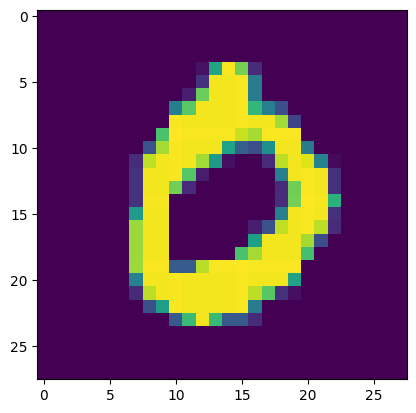

In [37]:
plt.imshow(x_test_reshaped[2])

In [53]:
import cv2 as cv

test_img = cv.imread('/content/4.jpg')

test_img = test_img/255

